# **Natural Language Processing**
## *Practice 5 - Unsupervised learning*

## Objectives

* To know what machine learning is and to classify texts with unsupervised approaches using the Sklearn Python library.


## Machine Learning

Machine Learning is a scientific discipline in the field of Artificial Intelligence that creates systems that learn automatically. Learning in this context means identifying complex patterns in millions of data. The machine that actually learns is an algorithm that reviews the data and is able to predict future behaviors.


### Unsupervised learning

When dealing with real-world problems, most of the time, the data does not come with predefined labels, so we will try to develop machine learning models that can correctly label this data, finding by themselves some commonalities in the features.

#### 1. How it works

To understand how unsupervised learning works, we will use an example where we have a set of unlabeled data. From this dataset we extract its features in numerical vectors and with this, we train the machine learning algorithm in order to search for patterns among the data.


In the following example we can see that the algorithm generates a model (blue diamond) that is generated by the algorithm (blue circle). The training set will be in our case texts from which we will extract the feature vector (blue vertical lines). We can provide the model with new data sets (test set) from which we will also extract its features so that it will group the new elements that it has never seen before using the previously generated model. In this example we can see an unsupervised classification of fruits, the algorithm finally groups them according to their category:

<img src="https://www.diegocalvo.es/wp-content/uploads/2019/03/aprendizaje_no_supervisado.png" width="600" height="300" />




#### 2. Clustering

In basic terms, the goal of clustering is to find different groups within the data elements. To do this, clustering algorithms find structure in the data so that elements in the same cluster (or group) are more similar to each other than to those in different clusters.

<img src="https://www.diegocalvo.es/wp-content/uploads/2019/03/clustering.png" width="300" height="200" />


Some of the most common clustering algorithms are:

* K-Means
* Hierarchical Clustering
* Density Based Scan Clustering (DBSCAN)
* Gaussian Clustering Model

In class we will implement the **K-means** algorithm.

The objective of this algorithm is to find "K" clusters among the data.


<img src="https://static.javatpoint.com/tutorial/machine-learning/images/k-means-clustering-algorithm-in-machine-learning.png" width="500" height="300" />



To implement this method, we must add the necessary libraries (sklearn must be installed if necessary):


In [ ]:
from sklearn.cluster import KMeans

 We add the texts in a Python list:

In [ ]:
documents = ["This little kitty came to play when I was eating at a restaurant.",
             "Merley has the best squooshy kitten belly.",
             "Google Translate app is incredible.",
             "If you open 100 tab in google you get a smiley face.",
             "Best cat photo I've ever taken.",
             "Climbing ninja cat.",
            "Impressed with google map feedback.",
              "Key promoter extension for Google Chrome."]


#### TF-IDF

The TfidfVectorizer method uses a vocabulary to generate a Tf-Idf (term frequency - inverse document frequency) matrix.

Tf-idf is a numerical measure that expresses how relevant a word is to a document in a collection. This measure is often used as a weighting factor in information retrieval and text mining.

For this we will first define the class **TfidfVectorizer()** and then use the **.fit_transform()** method with which we will obtain the feature vector of the training texts:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(documents)

We create the model with the **KMeans()** class using the parameters that are convenient (you can try several parameters using the documentation) and we train the k-means model with the **.fit()** method. Finally, k is the number of groups we want to obtain:


In [ ]:
k = 2
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(max_iter=100, n_clusters=2, n_init=1)

Now, we can see information about the clusters created by the model:

In [ ]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(k):
  print("\nCluster:", i)
  for ind in order_centroids[i, :10]:
    print(' \t', terms[ind])

Top terms per cluster:

Cluster: 0
 	 cat
 	 best
 	 climbing
 	 ninja
 	 ve
 	 taken
 	 photo
 	 ever
 	 kitten
 	 merley

Cluster: 1
 	 google
 	 you
 	 translate
 	 with
 	 impressed
 	 is
 	 map
 	 incredible
 	 feedback
 	 app


We are going to predict in which group or cluster a new text would fit using the previously created model. To do this we introduce a new text in a vector, we extract its feature vectors with the previously generated Tf-Idf model using the **.transform()** method and finally we obtain the model prediction using the **.predict()** method:

In [ ]:
text = ["My chrome browser to open."]
Y = vectorizer.transform(text)
prediction = model.predict(Y)
print('Cluster id:', prediction)
text = ["Drago's cat is cute."]
Y = vectorizer.transform(text)
prediction = model.predict(Y)
print('Cluster id:', prediction)


Cluster id: [1]
Cluster id: [0]


### Latent Dirichlet Allocation

The LDA algorithm can perform an unsupervised classification of a set of documents, in particular, the topics of the documents. It is based on the probabilistic distribution of terms instead of similarity measures.

In [ ]:
text = ["My chrome browser to open."]
Y = vectorizer.transform(text)
prediction = model.predict(Y)
print(Y.data)
print('Cluster donde encajaría:', prediction)
text = ["Drago's cat is cute."]
Y = vectorizer.transform(text)
print(Y.data)
prediction = model.predict(Y)
print('Cluster donde encajaría:', prediction)

[0.57735027 0.57735027 0.57735027]
Cluster donde encajaría: [1]
[0.64232803 0.76642984]
Cluster donde encajaría: [0]


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation as LatentDA
import numpy as np

lda = LatentDA(n_components=2, random_state=0, max_iter=10)
lda.fit(X)
lda.transform(X)
for i, topic in enumerate(lda.components_):
  print(f'\nCluster: {i}')
  top_terms_ind = topic.argsort()[-10:]
  print('\t'+'\n\t'.join(list(reversed(terms[top_terms_ind]))))

text = ["My chrome browser to open."]
Y = vectorizer.transform(text)
print(f'Cluster: {np.argmax(lda.transform(Y))}')
text = ["Drago's cat is cute."]
Y = vectorizer.transform(text)
print(f'Cluster: {np.argmax(lda.transform(Y))}')


Cluster: 0
	cat
	climbing
	ninja
	translate
	app
	incredible
	is
	taken
	ever
	photo

Cluster: 1
	google
	you
	impressed
	map
	with
	feedback
	key
	promoter
	chrome
	extension
Cluster: 1
Cluster: 0


## Tutorials
Tutorial on unsupervised algorithms: https://cutt.ly/CtYl63Y  

K-means tutorial: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

Tf-Idf tutorial: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html



## Exercise 1

The result of this practice must be delivered in PLATEA and the deadline for delivery is **23:59 hours on March 24, 2025**. This same notebook with extension *.ipynb* will be submitted and renamed as follows: pr6_user1_user2.ipynb. Replace "user1" and "user2" with your email alias.

Use the SFU corpus available in Docencia Virtual to create a K-means model. Since the corpus is divided in 8 categories (books, cars, music, etc) we will use k = 8 for the grouping.

Processes the text of each document in the collection:
* Tokenize the text
* Eliminate stop-words
* Reduce the words to their root
* Change text to lowercase

Later, you must use the method seen in Tf-Idf class on the documents already processed and train the k-means model.

Finally, you must predict the group of these texts:

```
My accommodation is near the river and the mountain.
I have John Lennon's CD at home
The most interesting sections are the last ones.
I enjoyed with the last essay of Pinker.
The steering of the car is very hard.
```

**NOTE**: It is important to process the texts we want to predict in the same way that we have processed all the documents in the collection so that the model can find the same words.





In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
import nltk
import string
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [71]:
def preprocess_text(text):
  text = text.lower()
  text = text.translate(str.maketrans('', '', string.punctuation))
  tokens = word_tokenize(text)
  stop_words = set(stopwords.words('english'))
  tokens = [token for token in tokens if token not in stop_words]
  lemmatizer = WordNetLemmatizer()
  tokens = [lemmatizer.lemmatize(token) for token in tokens]
  return tokens

In [72]:
import os
import spacy
nlp = spacy.load("en_core_web_sm")

def spacy_sent_tokenize(text):
    doc = nlp(text)
    return [sent.text for sent in doc.sents]

root_folder_path = '/content/drive/MyDrive/NLP/SFU'
subfolders = [f.path for f in os.scandir(root_folder_path) if f.is_dir()]

all_documents = []

for subfolder in subfolders:
    print(f"Working with folder: {subfolder}")
    files = [f.path for f in os.scandir(subfolder) if f.is_file()]

    for current_file in files:
        with open(current_file, 'r', encoding='latin-1') as f:
          text = f.read()
          processed_text = preprocess_text(text)
          all_documents.append(" ".join(processed_text))


Working with folder: /content/drive/MyDrive/NLP/SFU/MUSIC
Working with folder: /content/drive/MyDrive/NLP/SFU/BOOKS
Working with folder: /content/drive/MyDrive/NLP/SFU/COMPUTERS
Working with folder: /content/drive/MyDrive/NLP/SFU/HOTELS
Working with folder: /content/drive/MyDrive/NLP/SFU/PHONES
Working with folder: /content/drive/MyDrive/NLP/SFU/COOKWARE
Working with folder: /content/drive/MyDrive/NLP/SFU/CARS
Working with folder: /content/drive/MyDrive/NLP/SFU/MOVIES


In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_df=0.4, min_df=0.05)
X = vectorizer.fit_transform(all_documents)

In [74]:
k = 8
model = KMeans(n_clusters=k, n_init=10, random_state=42)
model.fit(X)

KMeans(n_init=10, random_state=42)

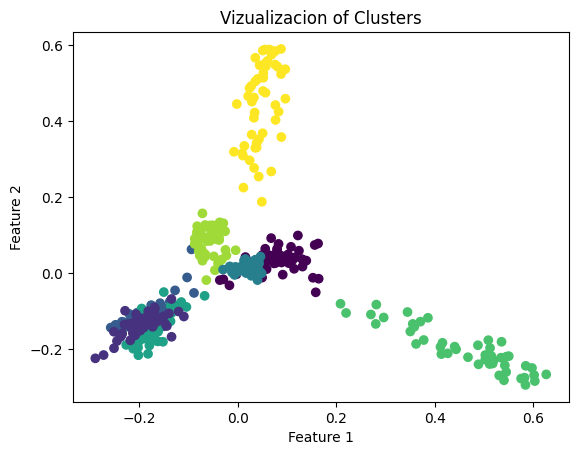

In [75]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
reduced_features = pca.fit_transform(X.toarray())

plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=model.labels_)
plt.title('Vizualizacion of Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()

In [76]:
from plotly.express import scatter
import pandas as pd

df = pd.DataFrame({
    'PC1': reduced_features[:, 0],
    'PC2': reduced_features[:, 1],
    'Cluster': model.labels_,
    'Text': [" ".join(doc.split()[:5]) + "..." for doc in all_documents]
})

fig = scatter(df, x='PC1', y='PC2', color='Cluster', hover_data=['Text'],
             title='Interactive Cluster Visualization')
fig.show()

In [77]:
documents = ["My accommodation is near the river and the mountain.",
             "I have John Lennon's CD at home",
             "The most interesting sections are the last ones.",
             "I enjoyed with the last essay of Pinker.",
             "The steering of the car is very hard."]

In [82]:
processed_docs = []
for doc in documents:
    tokens = preprocess_text(doc)
    if tokens:
      processed_docs.append(" ".join(tokens))

In [83]:
Y = vectorizer.transform(processed_docs)

cluster_predictions = model.predict(Y)

for i, (doc, cluster) in enumerate(zip(documents, cluster_predictions)):
    print(f"Document: '{doc}'")
    print(f"\tPreprocessed text: '{processed_docs[i]}'")
    print(f"\tCluster: {cluster}\n")

Document: 'My accommodation is near the river and the mountain.'
	Preprocessed text: 'accommodation near river mountain'
	Cluster: 0

Document: 'I have John Lennon's CD at home'
	Preprocessed text: 'john lennon cd home'
	Cluster: 0

Document: 'The most interesting sections are the last ones.'
	Preprocessed text: 'interesting section last one'
	Cluster: 0

Document: 'I enjoyed with the last essay of Pinker.'
	Preprocessed text: 'enjoyed last essay pinker'
	Cluster: 0

Document: 'The steering of the car is very hard.'
	Preprocessed text: 'steering car hard'
	Cluster: 7



In [81]:

cluster_centers = model.cluster_centers_

feature_names = vectorizer.get_feature_names_out()

for i in range(k):
    print(f"\nCluster {i}:")

    top_terms_indices = cluster_centers[i].argsort()[-10:]
    top_terms = [feature_names[index] for index in top_terms_indices]

    print("Top terms:", top_terms)



Cluster 0:
Top terms: ['software', 'screen', 'machine', 'drive', 'system', 'dvd', 'mac', 'pc', 'apple', 'computer']

Cluster 1:
Top terms: ['dr', 'christmas', 'character', 'story', 'detail', 'kid', 'plot', 'cat', 'film', 'movie']

Cluster 2:
Top terms: ['rapper', 'music', 'production', 'hiphop', 'lyric', 'rap', 'beat', 'track', 'song', 'album']

Cluster 3:
Top terms: ['heat', 'stainless steel', 'cook', 'handle', 'steel', 'set', 'stainless', 'pot', 'cookware', 'pan']

Cluster 4:
Top terms: ['john', 'king', 'plot', 'reading', 'reader', 'character', 'novel', 'read', 'story', 'book']

Cluster 5:
Top terms: ['unit', 'call', 'feature', 'base', 'system', 'cordless', 'battery', 'panasonic', 'handset', 'phone']

Cluster 6:
Top terms: ['area', 'restaurant', 'night', 'service', 'stay', 'disney', 'pool', 'resort', 'room', 'hotel']

Cluster 7:
Top terms: ['road', 'interior', 'focus', 'rear', 'vehicle', 'driving', 'ford', 'engine', 'seat', 'car']
